In [1]:
from arpes.io import example_data
from arpes.all import broadcast_model, AffineBroadenedFD

photon_energy = example_data.photon_energy

C:\Users\hellbrue\Documents\Repositories\pyarpes\arpes\config.py:54: UserWarning: Could not find local configuration file. If you don't have one, you can safely ignore this message.
  warnings.warn(msg)


Activating auto-logging. Current session state plus future input saved.
Filename       : logs\unnamed_2022-09-16_15-12-37.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


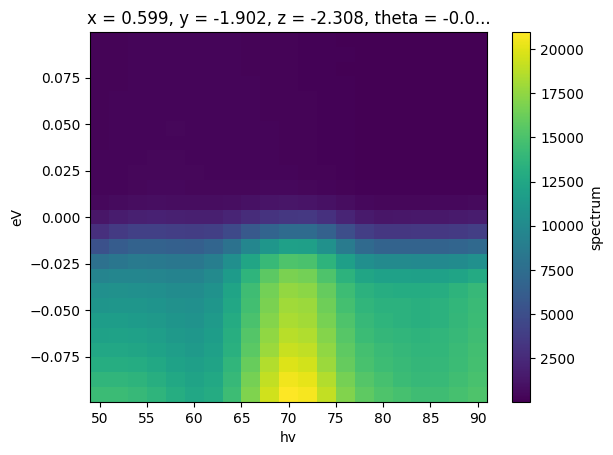

In [2]:
edge_data = photon_energy.sel(
    phi=slice(-0.28, -0.15), eV=slice(-0.1, 0.1)).sum("phi").spectrum
edge_data.T.plot()

Running on multiprocessing pool... this may take a while the first time.


Fitting on pool...:   0%|          | 0/21 [00:00<?, ?it/s]

Deserializing...
Finished deserializing


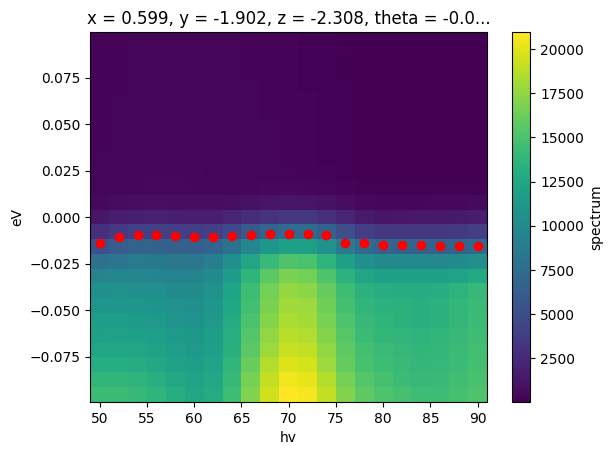

In [3]:
import matplotlib.pyplot as plt
results = broadcast_model(AffineBroadenedFD, edge_data, "hv")

fig, ax = plt.subplots()
edge_data.T.plot(ax=ax)
ax.scatter(*results.F.p("fd_center").G.to_arrays(), color="red")

Running on multiprocessing pool... this may take a while the first time.


Fitting on pool...:   0%|          | 0/21 [00:00<?, ?it/s]

Deserializing...
Finished deserializing


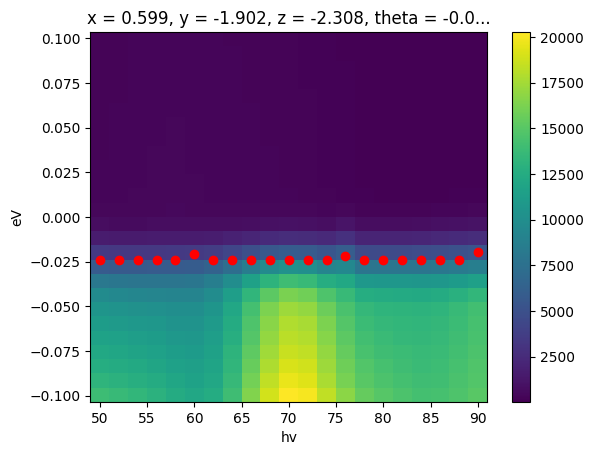

In [4]:
corrected_photon_energy = photon_energy.spectrum.G.shift_by(
    results.F.p("fd_center"), shift_axis="eV", shift_coords=True)
corrected_edge_data = corrected_photon_energy.sel(
    phi=slice(-0.28, -0.15), eV=slice(-0.1, 0.1)).sum("phi")

results_check = broadcast_model(AffineBroadenedFD, corrected_edge_data, "hv")

fig, ax = plt.subplots()
corrected_edge_data.T.plot(ax=ax)
ax.scatter(*results_check.F.p("fd_center").G.to_arrays(), color="red")

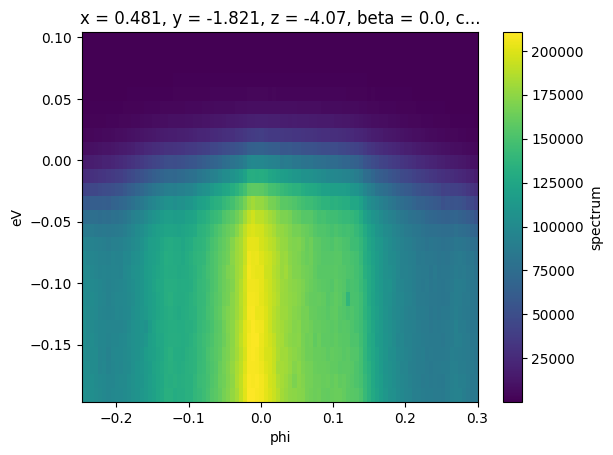

In [7]:
from arpes.io import example_data

cut = example_data.map.sum("theta").spectrum
cut = cut.sel(eV=slice(-0.2, 0.1), phi=slice(-0.25, 0.3))
cut.S.plot()

Running on multiprocessing pool... this may take a while the first time.


Fitting on pool...:   0%|          | 0/96 [00:00<?, ?it/s]

Deserializing...
Finished deserializing


(-0.05, 0.05)

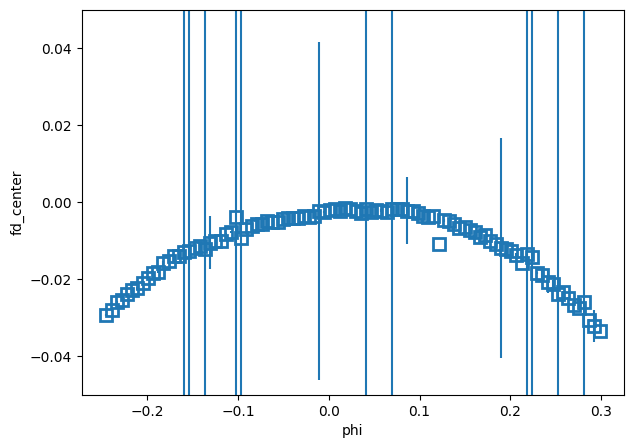

In [8]:
from arpes.fits.utilities import broadcast_model
from arpes.fits.fit_models import AffineBroadenedFD, QuadraticModel
import matplotlib.pyplot as plt

results = broadcast_model(AffineBroadenedFD, cut, "phi")

results.F.plot_param("fd_center")
plt.gca().set_ylim([-0.05, 0.05])

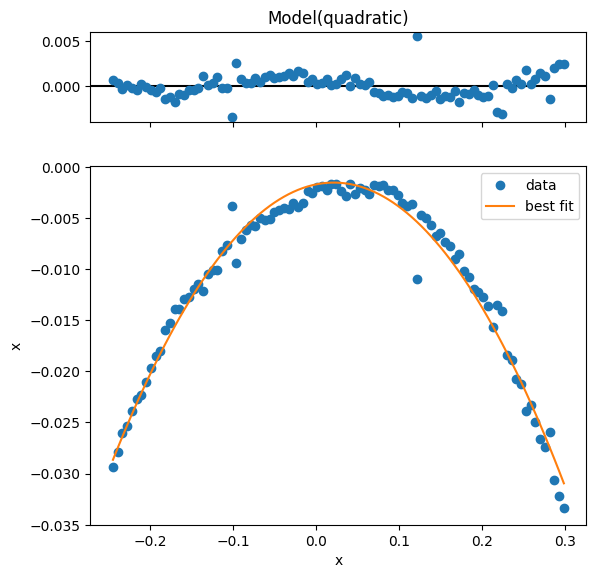

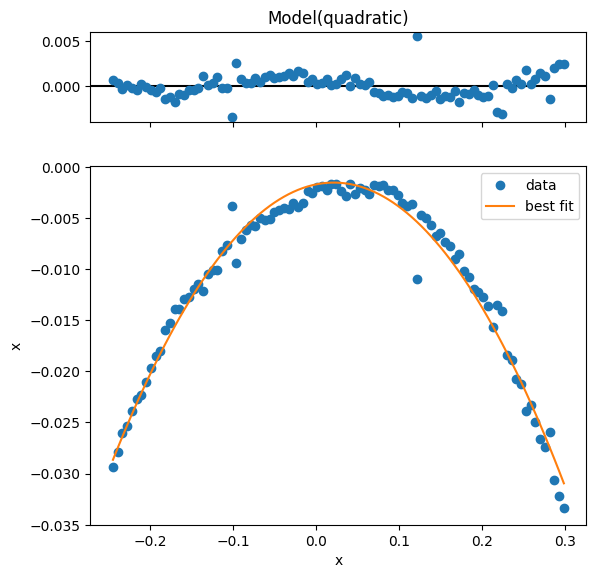

In [11]:
quad_mod = QuadraticModel().guess_fit(results.F.p("fd_center"))
quad_mod.plot()

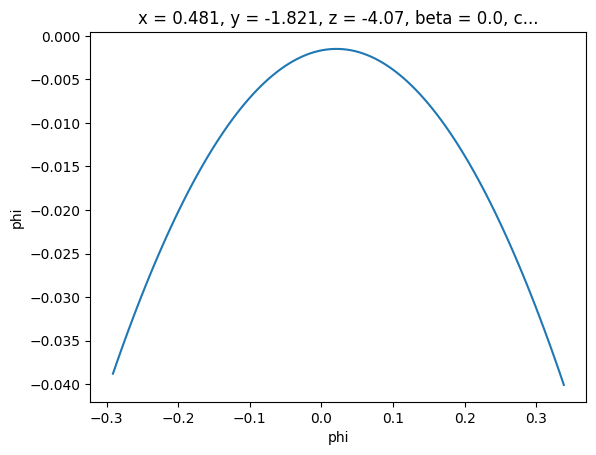

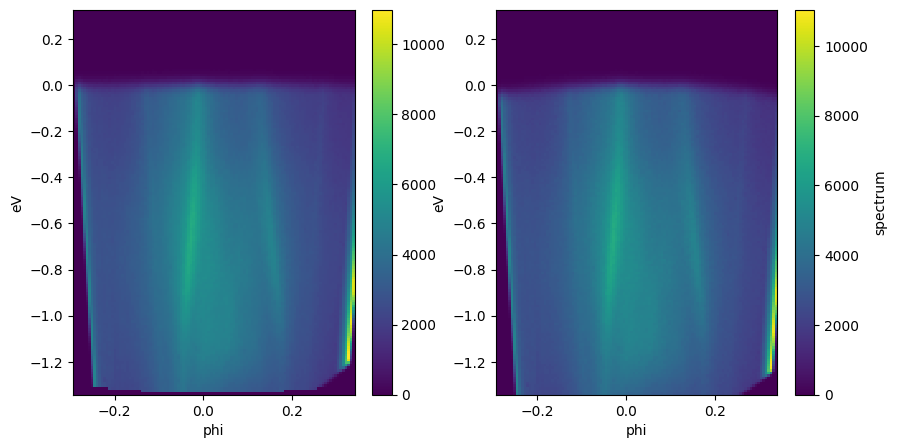

In [97]:
fmap = example_data.map.spectrum
edge = quad_mod.eval(x=fmap.phi)

edge.plot()

corrected_map = fmap.G.shift_by(edge, "eV")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
corrected_map.isel(theta=10).S.plot(ax=axes[0])
fmap.isel(theta=10).S.plot(ax=axes[1])

for ax in axes:
    ax.set_title("")

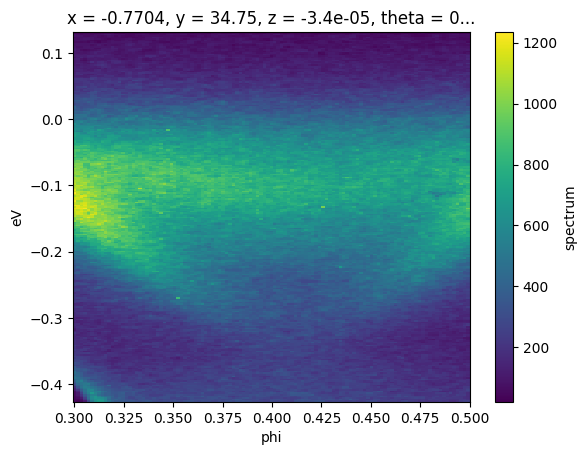

In [112]:
# Exercise 1
bise = example_data.cut
bise_center = bise.sel(phi=slice(0.3,0.5))
bise_center.spectrum.T.plot()

Running on multiprocessing pool... this may take a while the first time.


Fitting on pool...:   0%|          | 0/240 [00:00<?, ?it/s]

Deserializing...
Finished deserializing


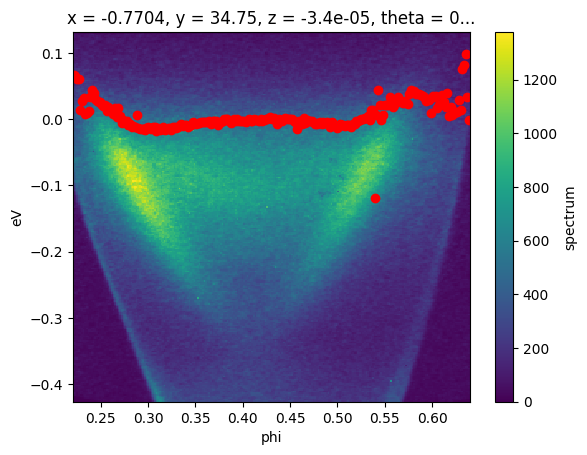

In [113]:
edge = broadcast_model(AffineBroadenedFD, bise, "phi")

fig, ax = plt.subplots()
bise.spectrum.T.plot(ax=ax)
ax.scatter(*edge.F.p("fd_center").G.to_arrays(), color="red")

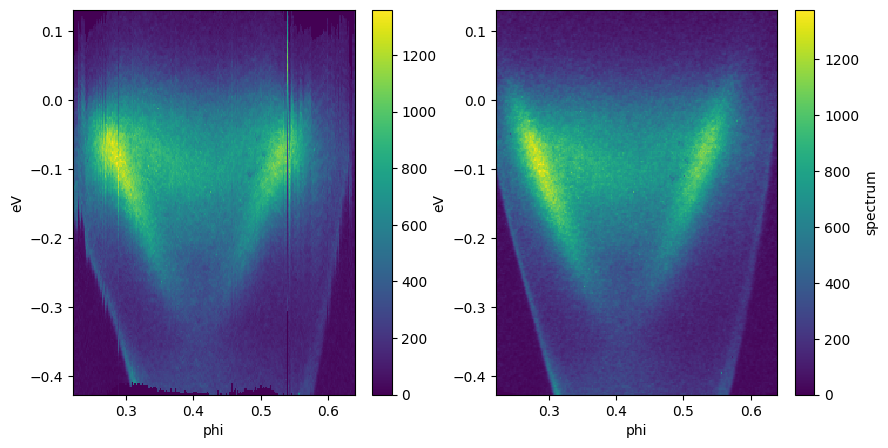

In [119]:
correct_cut = bise.spectrum.T.G.shift_by(edge.F.p("fd_center"), "eV")
                              
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
correct_cut.S.plot(ax=axes[0])
bise.spectrum.T.plot(ax=axes[1])

for ax in axes:
    ax.set_title("")

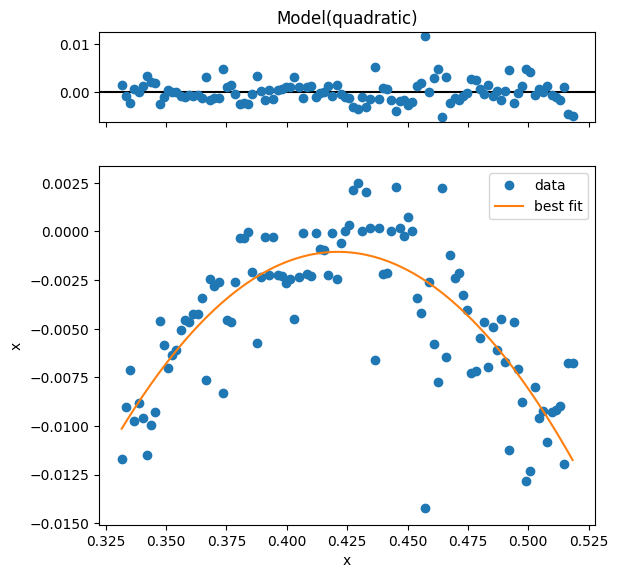

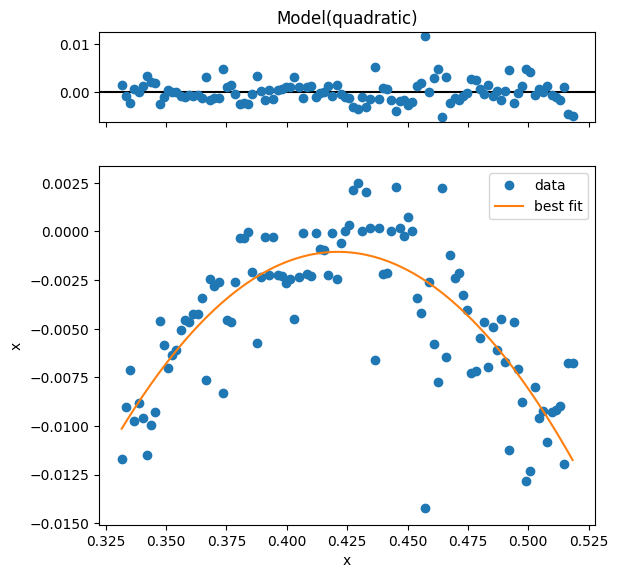

In [130]:
quad_mod = QuadraticModel().guess_fit(edge.sel(phi=slice(0.33,0.52)).F.p("fd_center"))
quad_mod.plot()

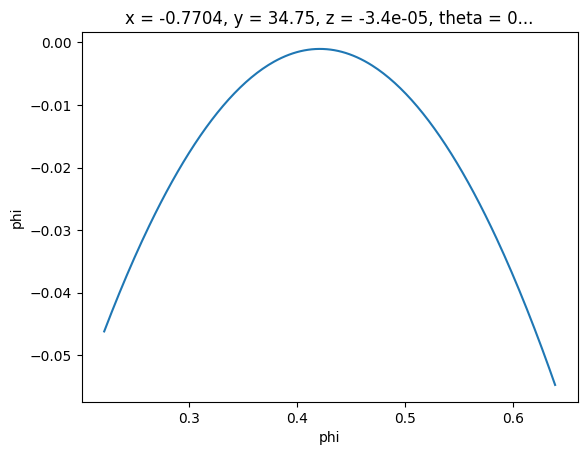

In [131]:
new_fermi = quad_mod.eval(x=bise.phi)
new_fermi.plot()

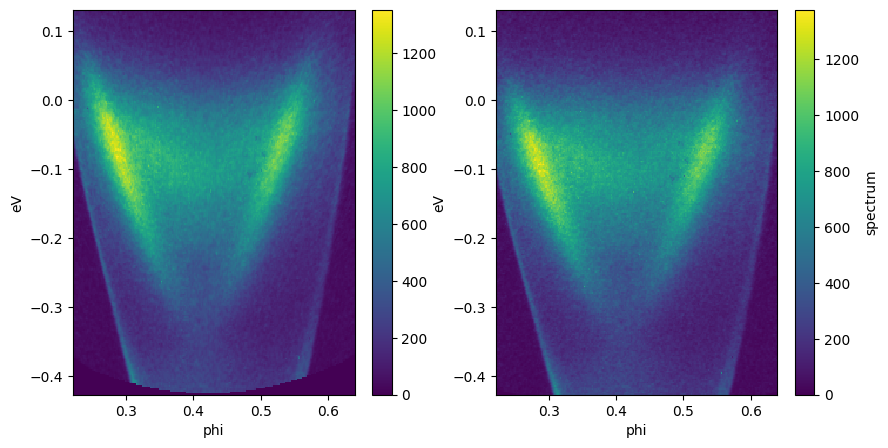

In [132]:
correct_cut = bise.spectrum.T.G.shift_by(new_fermi, "eV")
                              
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
correct_cut.S.plot(ax=axes[0])
bise.spectrum.T.plot(ax=axes[1])

for ax in axes:
    ax.set_title("")

Running on multiprocessing pool... this may take a while the first time.


Fitting on pool...:   0%|          | 0/240 [00:00<?, ?it/s]

Deserializing...
Finished deserializing


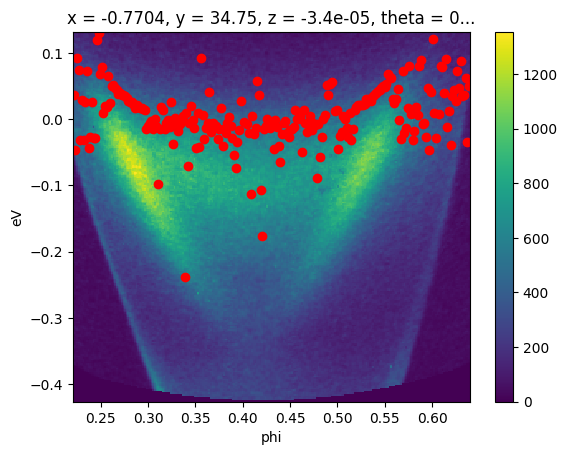

In [135]:
edge = broadcast_model(AffineBroadenedFD, correct_cut, "phi")

fig, ax = plt.subplots()
correct_cut.plot(ax=ax)
ax.scatter(*edge.F.p("fd_center").G.to_arrays(), color="red")